# Week 10 Homework: Heart Disease Prediction 

#### Questions:

1. What are the dimensions of the matrices you will use to represent your model (inputs, parameters,
  and outputs)? How will you integrate the concept of mini-batch training? 

The input layer will have 13 nodes because we have 13 features, excluding the target.
The hidden layer can accept any number of nodes, but we are given to firstly start  with 6, and the the second layer of 4 units and then output, which makes the predictions, will have 1 node.

Input=212x13 matrix

1st hidden layer=13x6 matrix

2st hidden layer=6x4 matrix

Conversion to pred=4x91 matrix

Output=91x1 matrix predictions

For the parameters, I will collect them in dictionary, they will have a total len of 11:
W1, W2, W3, Z1, Z2, Z3, A1, A2, b1, b2, b3
So, the matrix for the parameters will be 3d matrix. The number of its layers are 2, layers have 6 and 4 number of neurons respectively, and each neuron has 11 parameters. 
Total will be 2x6x11 and 2x4x11 matrixes 


Batch size is the number of training samples we use in a single batch.  As the data we use is small, we can use the size of 8.

2. How to check whether or not you should keep training your model?


In order to determine when training deep neural networks is to select the epoch in which to stop. We can use the concept of early stoppping.

By analyzing the error or loss graph in both the training and validation splits as the epochs pass, we will see that at first both decrease. However, the validation error will start to flatten out or increase at a certain time while the training error will continue to decrease.

The purpose of a validation set is to give us an idea of how our model behaves on data on which it has not been trained. Therefore, the epoch when the validation error starts to increase is precisely when the model is overfitting to the training set and does not generalize new data correctly. This is when we need to stop our training.

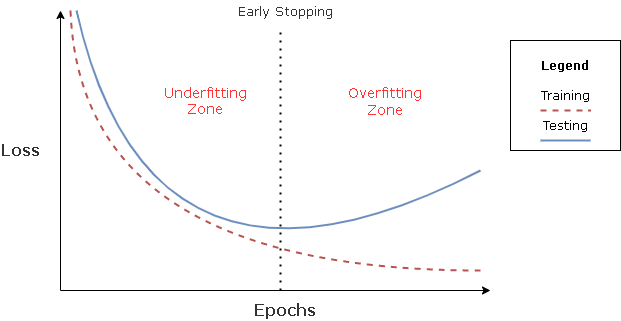

In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data understaning and preparation

In [3]:
#column names 
column_names =  ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

df = pd.read_csv('heart_disease_dataset.csv', sep=';', names=column_names)
df.drop(labels=0, axis=0, inplace=True)
df.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal,heart_disease
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal,heart_disease
count,303,303,303,303,303,303,303,303,303,303,303,303,303,303
unique,41,2,4,49,152,2,3,91,2,40,3,5,4,2
top,58,1,0,120,204,0,1,162,0,0.0,2,0,2,1
freq,19,207,143,37,6,258,152,11,204,99,142,175,166,165


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      303 non-null    object
 1   sex                      303 non-null    object
 2   chest_pain               303 non-null    object
 3   resting_blood_pressure   303 non-null    object
 4   serum_cholestoral        303 non-null    object
 5   fasting_blood_sugar      303 non-null    object
 6   resting_ecg_results      303 non-null    object
 7   max_heart_rate_achieved  303 non-null    object
 8   exercise_induced_angina  303 non-null    object
 9   oldpeak                  303 non-null    object
 10  slope of the peak        303 non-null    object
 11  num_of_major_vessels     303 non-null    object
 12  thal                     303 non-null    object
 13  heart_disease            303 non-null    object
dtypes: object(14)
memory usage: 35.5+ KB


In [7]:
df.isnull().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.dtypes

age                        object
sex                        object
chest_pain                 object
resting_blood_pressure     object
serum_cholestoral          object
fasting_blood_sugar        object
resting_ecg_results        object
max_heart_rate_achieved    object
exercise_induced_angina    object
oldpeak                    object
slope of the peak          object
num_of_major_vessels       object
thal                       object
heart_disease              object
dtype: object

In [10]:
df = df.astype({"oldpeak": float, "sex": int, "age":int, "chest_pain":int, "resting_blood_pressure":int, 
               "serum_cholestoral":int,"fasting_blood_sugar":int,"resting_ecg_results":int, "max_heart_rate_achieved":int,
               "exercise_induced_angina":int,"slope of the peak":int,"num_of_major_vessels":int,"thal":int, 
               "heart_disease":int})

In [11]:
df.dtypes

age                          int64
sex                          int64
chest_pain                   int64
resting_blood_pressure       int64
serum_cholestoral            int64
fasting_blood_sugar          int64
resting_ecg_results          int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
oldpeak                    float64
slope of the peak            int64
num_of_major_vessels         int64
thal                         int64
heart_disease                int64
dtype: object

In [12]:
df.heart_disease.value_counts()  #target balance 

1    165
0    138
Name: heart_disease, dtype: int64

In [13]:
X = df.drop('heart_disease', axis=1)
y= df['heart_disease'].values.reshape(X.shape[0], 1)

### Train-Test split

In [14]:
#split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3, random_state=3)

### Scaling

In [15]:
#standardize the dataset
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
print(f"Shape of train set is {X_train.shape}")
print(f"Shape of test set is {X_test.shape}")
print(f"Shape of train label is {y_train.shape}")
print(f"Shape of test labels is {y_test.shape}")

Shape of train set is (212, 13)
Shape of test set is (91, 13)
Shape of train label is (212, 1)
Shape of test labels is (91, 1)


# Modelling

In [17]:
#we have total
class ArtificialNeuralNetwork():  
    def __init__(self, layers=[13,6,4,1], learning_rate=0.001, iterations=100):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
                
    def init_weights(self):
        np.random.seed(1) 
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
        self.params['W3'] = np.random.randn(self.layers[2],self.layers[3]) 
        self.params['b3'] = np.random.randn(self.layers[3],)

    
    def relu(self,Z):
        return np.maximum(0,Z)

    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def eta(self, x):
      ETA = 0.0000000001
      return np.maximum(x, ETA)


    def sigmoid(self,Z):
        return 1/(1+np.exp(-Z))

    def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat = self.eta(yhat) ## clips value to avoid NaNs in log
        yhat_inv = self.eta(yhat_inv) 
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
        return loss

    def forward_propagation(self):
        
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        A2 = self.relu(Z2)
        Z3 = A2.dot(self.params['W3']) + self.params['b3']
        
        yhat = self.sigmoid(Z3)
        loss = self.entropy_loss(self.y,yhat)

        # saving calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['Z3'] = Z3
        self.params['A1'] = A1
        self.params['A2'] = A2

        return yhat,loss

    def back_propagation(self,yhat):
 
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z3 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A2 = dl_wrt_z3.dot(self.params['W3'].T)
        dl_wrt_w3 = self.params['A2'].T.dot(dl_wrt_z3)
        dl_wrt_b3 = np.sum(dl_wrt_z3, axis=0, keepdims=True)
        
        dl_wrt_z2 = dl_wrt_A2 * self.dRelu(self.params['Z2'])
        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #updating the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.init_weights() #initialize


        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)

    def predict(self, X):

        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        A2 = self.relu(Z2)
        Z3 = A2.dot(self.params['W3']) + self.params['b3']
        pred = self.sigmoid(Z3)
        return np.round(pred) 


    def acc(self, y, yhat):

        acc = int(sum(y == yhat) / len(y) * 100)
        return acc

    def plot_loss(self):
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()  

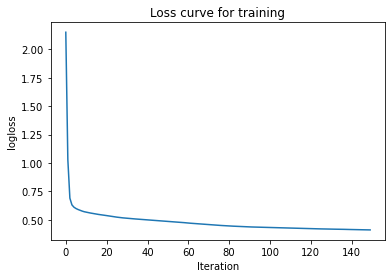

In [18]:
nn = ArtificialNeuralNetwork(layers=[13,6,4,1], learning_rate=0.01, iterations=150) 
nn.fit(X_train, y_train) 
nn.plot_loss()

In [19]:
train_pred = nn.predict(X_train)
test_pred = nn.predict(X_test)

print("Train accuracy is {}%".format(nn.acc(y_train, train_pred)))
print("Test accuracy is {}%".format(nn.acc(y_test, test_pred)))

Train accuracy is 89%
Test accuracy is 73%
